<a href="https://colab.research.google.com/github/fduartej/data_visualization_python/blob/main/notebook/CorrupcionPercepcionIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis de Datos de Corruption perceptions index (cpi) ranks countries/territories**

In [1]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive 
import libarchive 

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 42.1 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31648 sha256=42a0bbd49170eea5ca8181d006e94bbce4100a48af15f41a490dd1e0d361edc5
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [2]:
!apt-get -qq install -y graphviz && pip install pydot 
import pydot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install cartopy 
import cartopy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 25.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 42.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 50.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 53.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 32.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.7 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37

In [10]:
!pip install chart_studio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.9 MB/s 


In [4]:
!pip install plotly==5.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 17.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [5]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 29.8 MB/s 
     |████████████████████████████████| 16.7 MB 62.2 MB/s 
     |████████████████████████████████| 6.3 MB 67.0 MB/s 


In [6]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 22.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=ef8d1a6d307abba206169e48359457273e0985f8f01c22b09067c44da18624e9
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [7]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import plotly
plotly.__version__

'5.8.2'

In [12]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
import pycountry 
%matplotlib inline

#alfa code 3 caracteres
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# Import seaborn
# https://github.com/datasets/corruption-perceptions-index/blob/master/data/cpi.csv
cpi = pd.read_csv('cpi.csv',delimiter=";")


#https://github.com/melanieshi0120/COVID-19_global_time_series_panel_data/blob/master/data/countries_latitude_longitude.csv
countrycode = pd.read_csv('countries_latitude_longitude.csv',delimiter=",")

In [13]:
cpi['alpha3']=alpha3code(cpi.Country)
cpi.head()

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,alpha3
0,Denmark,88.0,88,87,88,88,90.0,91.0,92.0,91.0,90.0,DNK
1,New Zealand,88.0,88,87,87,89,90.0,91.0,91.0,91.0,90.0,NZL
2,Finland,88.0,85,86,85,85,89.0,90.0,89.0,89.0,90.0,FIN
3,Singapore,85.0,85,85,85,84,84.0,85.0,84.0,86.0,87.0,SGP
4,Sweden,85.0,85,85,85,84,88.0,89.0,87.0,89.0,88.0,SWE


In [14]:
countrycode.head()

,Country,latitude,longitude
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Angola,-11.202692,17.873887
4,Argentina,-38.416097,-63.616672


In [15]:
cpi = pd.merge(cpi,countrycode, on='Country')
cpi.head()

,Country,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,alpha3,latitude,longitude
0,Denmark,88.0,88,87,88,88,90.0,91.0,92.0,91.0,90.0,DNK,56.263920,9.501785
1,New Zealand,88.0,88,87,87,89,90.0,91.0,91.0,91.0,90.0,NZL,-40.900557,174.885971
2,Finland,88.0,85,86,85,85,89.0,90.0,89.0,89.0,90.0,FIN,61.892635,-6.911806
3,Sweden,85.0,85,85,85,84,88.0,89.0,87.0,89.0,88.0,SWE,60.128161,18.643501
4,Switzerland,84.0,85,85,85,85,86.0,86.0,86.0,85.0,86.0,CHE,46.818188,8.227512


In [16]:
# Paises de la union europea
# Alemania, Bélgica, Croacia, Dinamarca, España, Francia, Irlanda, Letonia, Luxemburgo, Países Bajos, Suecia, Bulgaria, Eslovaquia,
# Estonia, Grecia, Malta, Polonia, República Checa, Austria, Chipre, Eslovenia, Finlandia, Hungría, Italia, Lituania, Portugal y Rumanía

cpiEuropa = cpi[(cpi.Country == 'Germany') | (cpi.Country =='Belgium') | (cpi.Country =='Croatia') |
     (cpi.Country =='Denmark') | (cpi.Country =='Spain') | (cpi.Country =='France') |
     (cpi.Country =='Irland') | (cpi.Country =='Latvia') | (cpi.Country =='Luxemburgo') |
     (cpi.Country =='Netherlands') | (cpi.Country =='Sweden') | (cpi.Country =='Bulgaria') | 
     (cpi.Country =='Slovakia') | (cpi.Country =='Estonia') | (cpi.Country =='Greece') | 
     (cpi.Country =='Malta') | (cpi.Country =='Poland') | (cpi.Country =='Czechia') | 
     (cpi.Country =='Austria') | (cpi.Country =='Cyprus') | (cpi.Country =='Slovenia') | 
     (cpi.Country =='Finland') | (cpi.Country =='Hungary') | (cpi.Country =='Italy') | 
     (cpi.Country =='Lithuania') | (cpi.Country =='Portugal') | (cpi.Country =='Romania') 
    ] 

#cpiEuropa = cpiEuropa.reset_index(drop=True).set_index('Jurisdiction')
cpiEuropa = cpiEuropa[['Country','alpha3','latitude','longitude','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]
cpiEuropa


,Country,alpha3,latitude,longitude,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Denmark,DNK,56.263920,9.501785,90.0,91.0,92.0,91.0,90.0,88,88,87,88,88.0
2,Finland,FIN,61.892635,-6.911806,90.0,89.0,89.0,90.0,89.0,85,85,86,85,88.0
3,Sweden,SWE,60.128161,18.643501,88.0,89.0,87.0,89.0,88.0,84,85,85,85,85.0
5,Netherlands,NLD,52.132633,5.291266,84.0,83.0,83.0,87.0,83.0,82,82,82,82,82.0
6,Germany,DEU,51.165691,10.451526,79.0,78.0,79.0,81.0,81.0,81,80,80,80,80.0
11,Austria,AUT,47.516231,14.550072,69.0,69.0,72.0,76.0,75.0,75,76,77,76,74.0
12,Belgium,BEL,50.503887,4.469936,75.0,75.0,76.0,77.0,77.0,75,75,75,76,73.0
13,Estonia,EST,58.595272,25.013607,64.0,68.0,69.0,70.0,70.0,71,73,74,75,74.0
25,Portugal,PRT,39.399872,-8.224454,63.0,62.0,63.0,63.0,62.0,63,64,62,61,62.0
26,Lithuania,LTU,55.169438,23.881275,54.0,57.0,58.0,61.0,59.0,59,59,60,60,61.0


In [17]:
#transformar los valores a flotantes

#cpiEuropa['2005'] = cpiEuropa['2005'].astype(float)
#cpiEuropa['2006'] = cpiEuropa['2006'].astype(float)
#cpiEuropa['2007'] = cpiEuropa['2007'].astype(float)
#cpiEuropa['2008'] = cpiEuropa['2008'].astype(float)
#cpiEuropa['2009'] = cpiEuropa['2009'].astype(float)
#cpiEuropa['2010'] = cpiEuropa['2010'].astype(float)

cpiEuropa['2012'] = cpiEuropa['2012'].astype(float)
cpiEuropa['2013'] = cpiEuropa['2013'].astype(float)
cpiEuropa['2014'] = cpiEuropa['2014'].astype(float)
cpiEuropa['2015'] = cpiEuropa['2015'].astype(float)
cpiEuropa['2016'] = cpiEuropa['2016'].astype(float)
cpiEuropa['2017'] = cpiEuropa['2017'].astype(float)
cpiEuropa['2018'] = cpiEuropa['2018'].astype(float)
cpiEuropa['2019'] = cpiEuropa['2019'].astype(float)
cpiEuropa['2020'] = cpiEuropa['2020'].astype(float)
cpiEuropa['2021'] = cpiEuropa['2021'].astype(float)

cpiEuropa.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 55
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    22 non-null     object 
 1   alpha3     22 non-null     object 
 2   latitude   22 non-null     float64
 3   longitude  22 non-null     float64
 4   2012       22 non-null     float64
 5   2013       22 non-null     float64
 6   2014       22 non-null     float64
 7   2015       22 non-null     float64
 8   2016       22 non-null     float64
 9   2017       22 non-null     float64
 10  2018       22 non-null     float64
 11  2019       22 non-null     float64
 12  2020       22 non-null     float64
 13  2021       22 non-null     float64
dtypes: float64(12), object(2)
memory usage: 2.6+ KB


GEOPANDAS MAPA DE CPI EUROPA

In [18]:
## TODO: Mapita
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'alpha3', 'gdp_md_est', 'geometry']

mapa=pd.merge(world,cpiEuropa,on='alpha3')

mapa


,pop_est,continent,name,alpha3,gdp_md_est,geometry,Country,latitude,longitude,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",Sweden,60.128161,18.643501,88.0,89.0,87.0,89.0,88.0,84.0,85.0,85.0,85.0,85.0
1,38476269,Europe,Poland,POL,1052000.0,"POLYGON ((23.48413 53.91250, 23.52754 53.47012...",Poland,51.919438,19.145136,58.0,60.0,61.0,62.0,62.0,60.0,60.0,58.0,56.0,56.0
2,8754413,Europe,Austria,AUT,416600.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,47.516231,14.550072,69.0,69.0,72.0,76.0,75.0,75.0,76.0,77.0,76.0,74.0
3,9850845,Europe,Hungary,HUN,267600.0,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",Hungary,47.162494,19.503304,55.0,54.0,54.0,51.0,48.0,45.0,46.0,44.0,44.0,43.0
4,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((28.23355 45.48828, 28.67978 45.30403...",Romania,45.943161,24.966760,44.0,43.0,43.0,46.0,48.0,48.0,47.0,44.0,44.0,45.0
5,2823859,Europe,Lithuania,LTU,85620.0,"POLYGON ((26.49433 55.61511, 26.58828 55.16718...",Lithuania,55.169438,23.881275,54.0,57.0,58.0,61.0,59.0,59.0,59.0,60.0,60.0,61.0
6,1944643,Europe,Latvia,LVA,50650.0,"POLYGON ((27.28818 57.47453, 27.77002 57.24426...",Latvia,56.879635,24.603189,49.0,53.0,55.0,55.0,57.0,58.0,58.0,56.0,57.0,59.0
7,1251581,Europe,Estonia,EST,38700.0,"POLYGON ((27.98113 59.47537, 27.98112 59.47537...",Estonia,58.595272,25.013607,64.0,68.0,69.0,70.0,70.0,71.0,73.0,74.0,75.0,74.0
8,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",Germany,51.165691,10.451526,79.0,78.0,79.0,81.0,81.0,81.0,80.0,80.0,80.0,80.0
9,7101510,Europe,Bulgaria,BGR,143100.0,"POLYGON ((22.65715 44.23492, 22.94483 43.82379...",Bulgaria,42.733883,25.485830,41.0,41.0,43.0,41.0,41.0,43.0,42.0,43.0,44.0,42.0


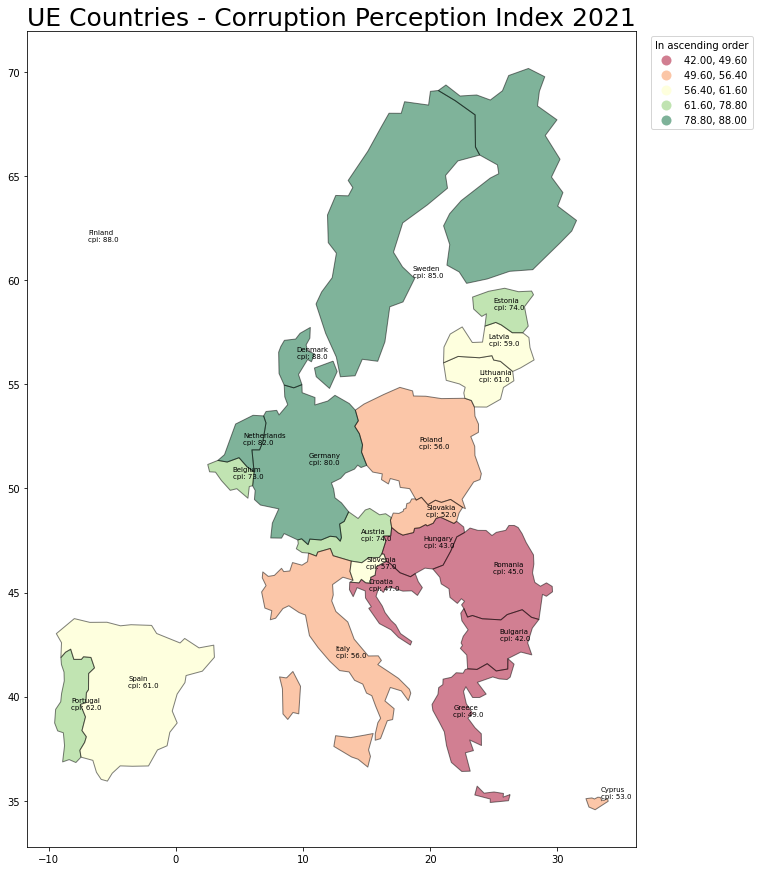

In [19]:
# plot cpi europa 2015
ax = mapa.plot(column='2021', scheme="quantiles",
           figsize=(25, 15),alpha=0.5, edgecolor='k',
           cmap='RdYlGn',legend=True)


plt.title('UE Countries - Corruption Perception Index 2021',fontsize=25)
# add countries names and numbers 
for i in range(0,22):
    plt.text(float(mapa.longitude[i]),
             float(mapa.latitude[i]),
             "{}\ncpi: {}".format(mapa.name[i],mapa['2021'][i]),
             size=7)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2,1))
leg.set_title("In ascending order")
plt.show()
# https://en.wikipedia.org/wiki/Corruption_Perceptions_Index

GRAFICO DE PENDIENTES

In [57]:
newCpiEuropa = cpiEuropa.melt(id_vars=["Country","alpha3","latitude","longitude"], 
        var_name="Annio", 
        value_name="Cpi")



newCpiEuropa = newCpiEuropa.sort_values(by=['Country', 'Annio'], ascending=True)
newCpiUEFilter = newCpiEuropa.loc[(newCpiEuropa["Annio"]=="2020") | (newCpiEuropa["Annio"]=="2021")]
newCpiUEFilter = newCpiUEFilter[(newCpiUEFilter.Country == 'Hungary') | (newCpiUEFilter.Country =='Romania') | (newCpiUEFilter.Country =='Croatia') |
     (newCpiUEFilter.Country =='Bulgaria') | (newCpiUEFilter.Country =='Greece')
    ] 
newCpiUEFilter

,Country,alpha3,latitude,longitude,Annio,Cpi
195,Bulgaria,BGR,42.733883,25.485830,2020,44.0
217,Bulgaria,BGR,42.733883,25.485830,2021,42.0
194,Croatia,HRV,45.100000,15.200000,2020,47.0
216,Croatia,HRV,45.100000,15.200000,2021,47.0
192,Greece,GRC,39.074208,21.824312,2020,50.0
214,Greece,GRC,39.074208,21.824312,2021,49.0
196,Hungary,HUN,47.162494,19.503304,2020,44.0
218,Hungary,HUN,47.162494,19.503304,2021,43.0
197,Romania,ROU,45.943161,24.966760,2020,44.0
219,Romania,ROU,45.943161,24.966760,2021,45.0


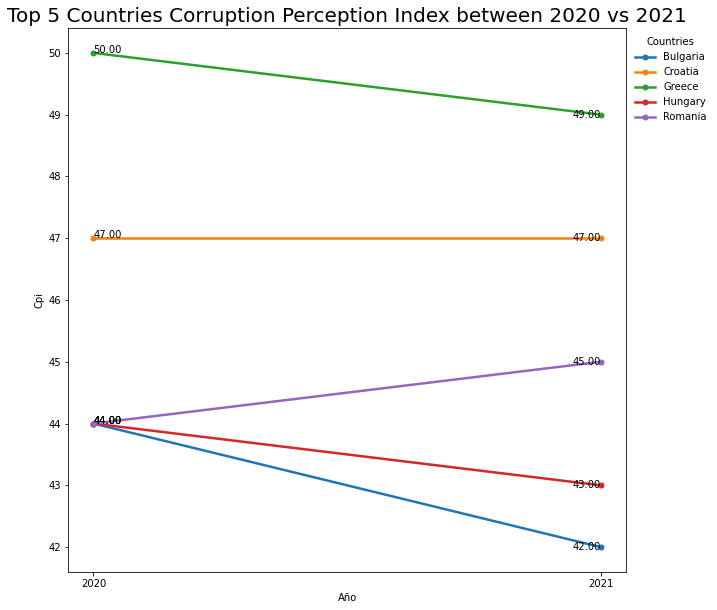

In [65]:
fig, ax = plt.subplots(1, figsize=(10,10))

countries = newCpiUEFilter.Country.unique()
colors = ['#769465', '#69BDE0', '#E06D5E', '#2F7694', '#94E069']


for i, v in enumerate(countries):
    temp = newCpiUEFilter[newCpiUEFilter['Country'] == v]
    plt.plot(temp.Annio, temp.Cpi, lw=2.5,marker='o', markersize=5)
    plt.text(temp.Annio.values[0], temp.Cpi.values[0], '{:,.2f}'.format(temp.Cpi.values[0]))
    plt.text(temp.Annio.values[1], temp.Cpi.values[1], '{:,.2f}'.format(temp.Cpi.values[1]), va='center', ha='right')

    

plt.title('Top 5 Countries Corruption Perception Index between 2020 vs 2021',fontsize=20)
plt.xlabel("Año")
plt.ylabel("Cpi")

leg = plt.legend(countries, loc='upper left', frameon=False)

leg.set_bbox_to_anchor((1,1))
leg.set_title("Countries")

plt.show()

GRAFICO DE ANIMACION

In [57]:
newCpi = newCpiEuropa[(newCpiEuropa.Country == 'Hungary') | (newCpiEuropa.Country =='Romania') | (newCpiEuropa.Country =='Croatia') |
     (newCpiEuropa.Country =='Bulgaria') | (newCpiEuropa.Country =='Greece')
    ] 

newCpi

,Country,alpha3,latitude,longitude,Annio,Cpi
19,Bulgaria,BGR,42.733883,25.485830,2012,41.0
41,Bulgaria,BGR,42.733883,25.485830,2013,41.0
63,Bulgaria,BGR,42.733883,25.485830,2014,43.0
85,Bulgaria,BGR,42.733883,25.485830,2015,41.0
107,Bulgaria,BGR,42.733883,25.485830,2016,41.0
129,Bulgaria,BGR,42.733883,25.485830,2017,43.0
151,Bulgaria,BGR,42.733883,25.485830,2018,42.0
173,Bulgaria,BGR,42.733883,25.485830,2019,43.0
195,Bulgaria,BGR,42.733883,25.485830,2020,44.0
217,Bulgaria,BGR,42.733883,25.485830,2021,42.0


In [110]:
fig = px.bar(newCpi, y='Country', x='Cpi', color_discrete_sequence=['red', 'yellow','green','blue','orange'],
             text='Cpi', range_x=[0,50], color='Country', animation_frame="Annio", animation_group="Country",
             labels={"Country":"", "Annio":"Año", })

#para colocar los números fuera de las barras
fig.update_traces(texttemplate='%{text:.2s}')

fig.update_layout(showlegend=False, #ocultra leyendas
                  title='Top 5 Countries Corruption Perception Index since 2012',
                  xaxis=dict(showticklabels=False)) #ocultar ticks

fig.update_yaxes(categoryorder='total ascending')
fig